In [1]:
import geopandas as gpd

In [3]:
gdf = gpd.read_feather(r"C:\Users\Pedro\Outer Loop Consulting\2022-01 - TMR GSM - Documents\General\submodels\logistic_path_choice\data\compass_iot_traces\all_vertices_sample.feather")

<Axes: >

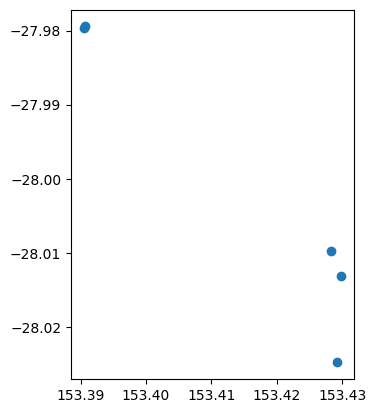

In [5]:
gdf.head().plot()